In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import ensemble
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

import optuna

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def plotter(data, target):
    from math import ceil
    fig, ax = plt.subplots(ceil(len(data.columns)/5), 5, figsize = (35, 20))
    ax = ax.flatten()

    # Iterate over the columns
    for i, column in enumerate(data.columns):
        ax[i].set_title(f'{column} vs {target}')
        ax[i].scatter(data[column], data[target])

In [4]:
def histogram_plotter(df):
    from math import ceil
    fig, ax = plt.subplots(ceil(len(df.columns)/5), 5, figsize = (35, 20))
    ax = ax.flatten()

    # Iterate over the columns
    for i, column in enumerate(df.columns):
        ax[i].set_title(column)
        ax[i].hist(df[column], edgecolor='black')

In [5]:
data = pd.read_csv('data.csv')
# encoding Jenis Kelamin if M = 1 and F = 0
data["Jenis Kelamin"] = data["Jenis Kelamin"].apply(lambda x: 1 if x == 'M' else 0)

data.drop(['Tempat lahir', 'Responden'], axis=1, inplace=True)


target = data['Cholesterol Total (mg/dL)']

data1 = data[data['Cholesterol Total (mg/dL)'] == 187]
data2 = data[data['Cholesterol Total (mg/dL)'] != 187]

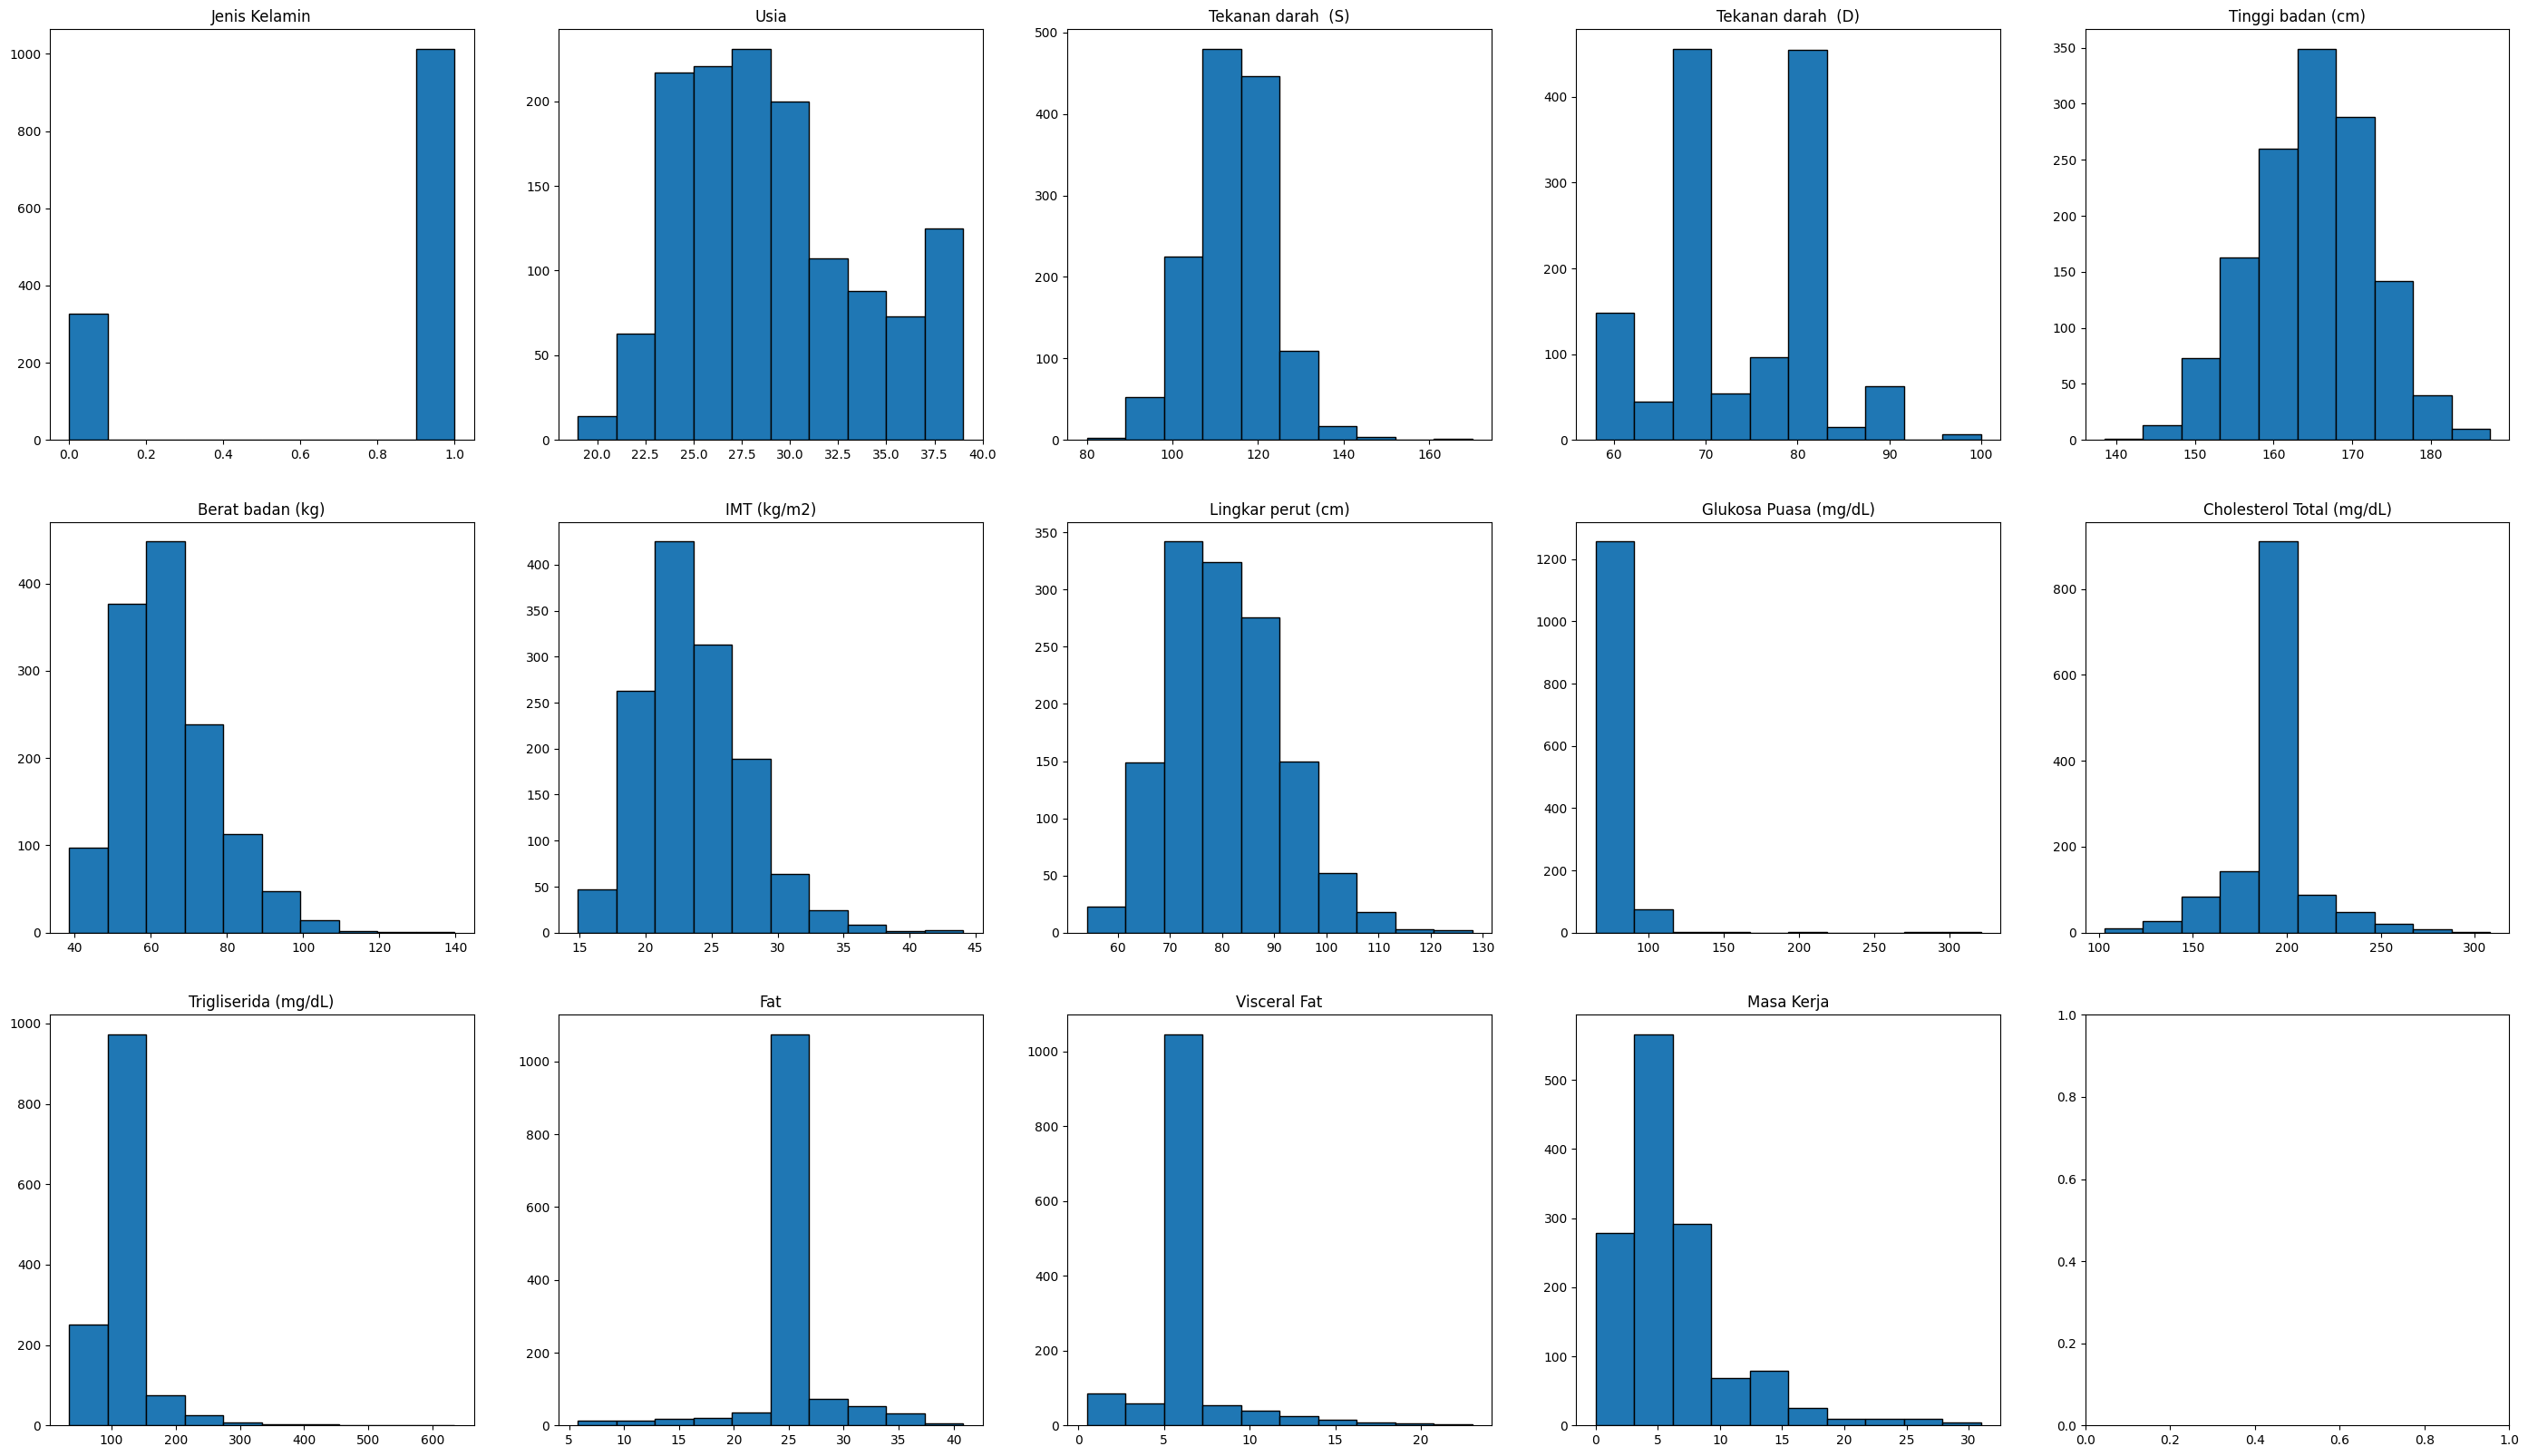

In [6]:
histogram_plotter(data)

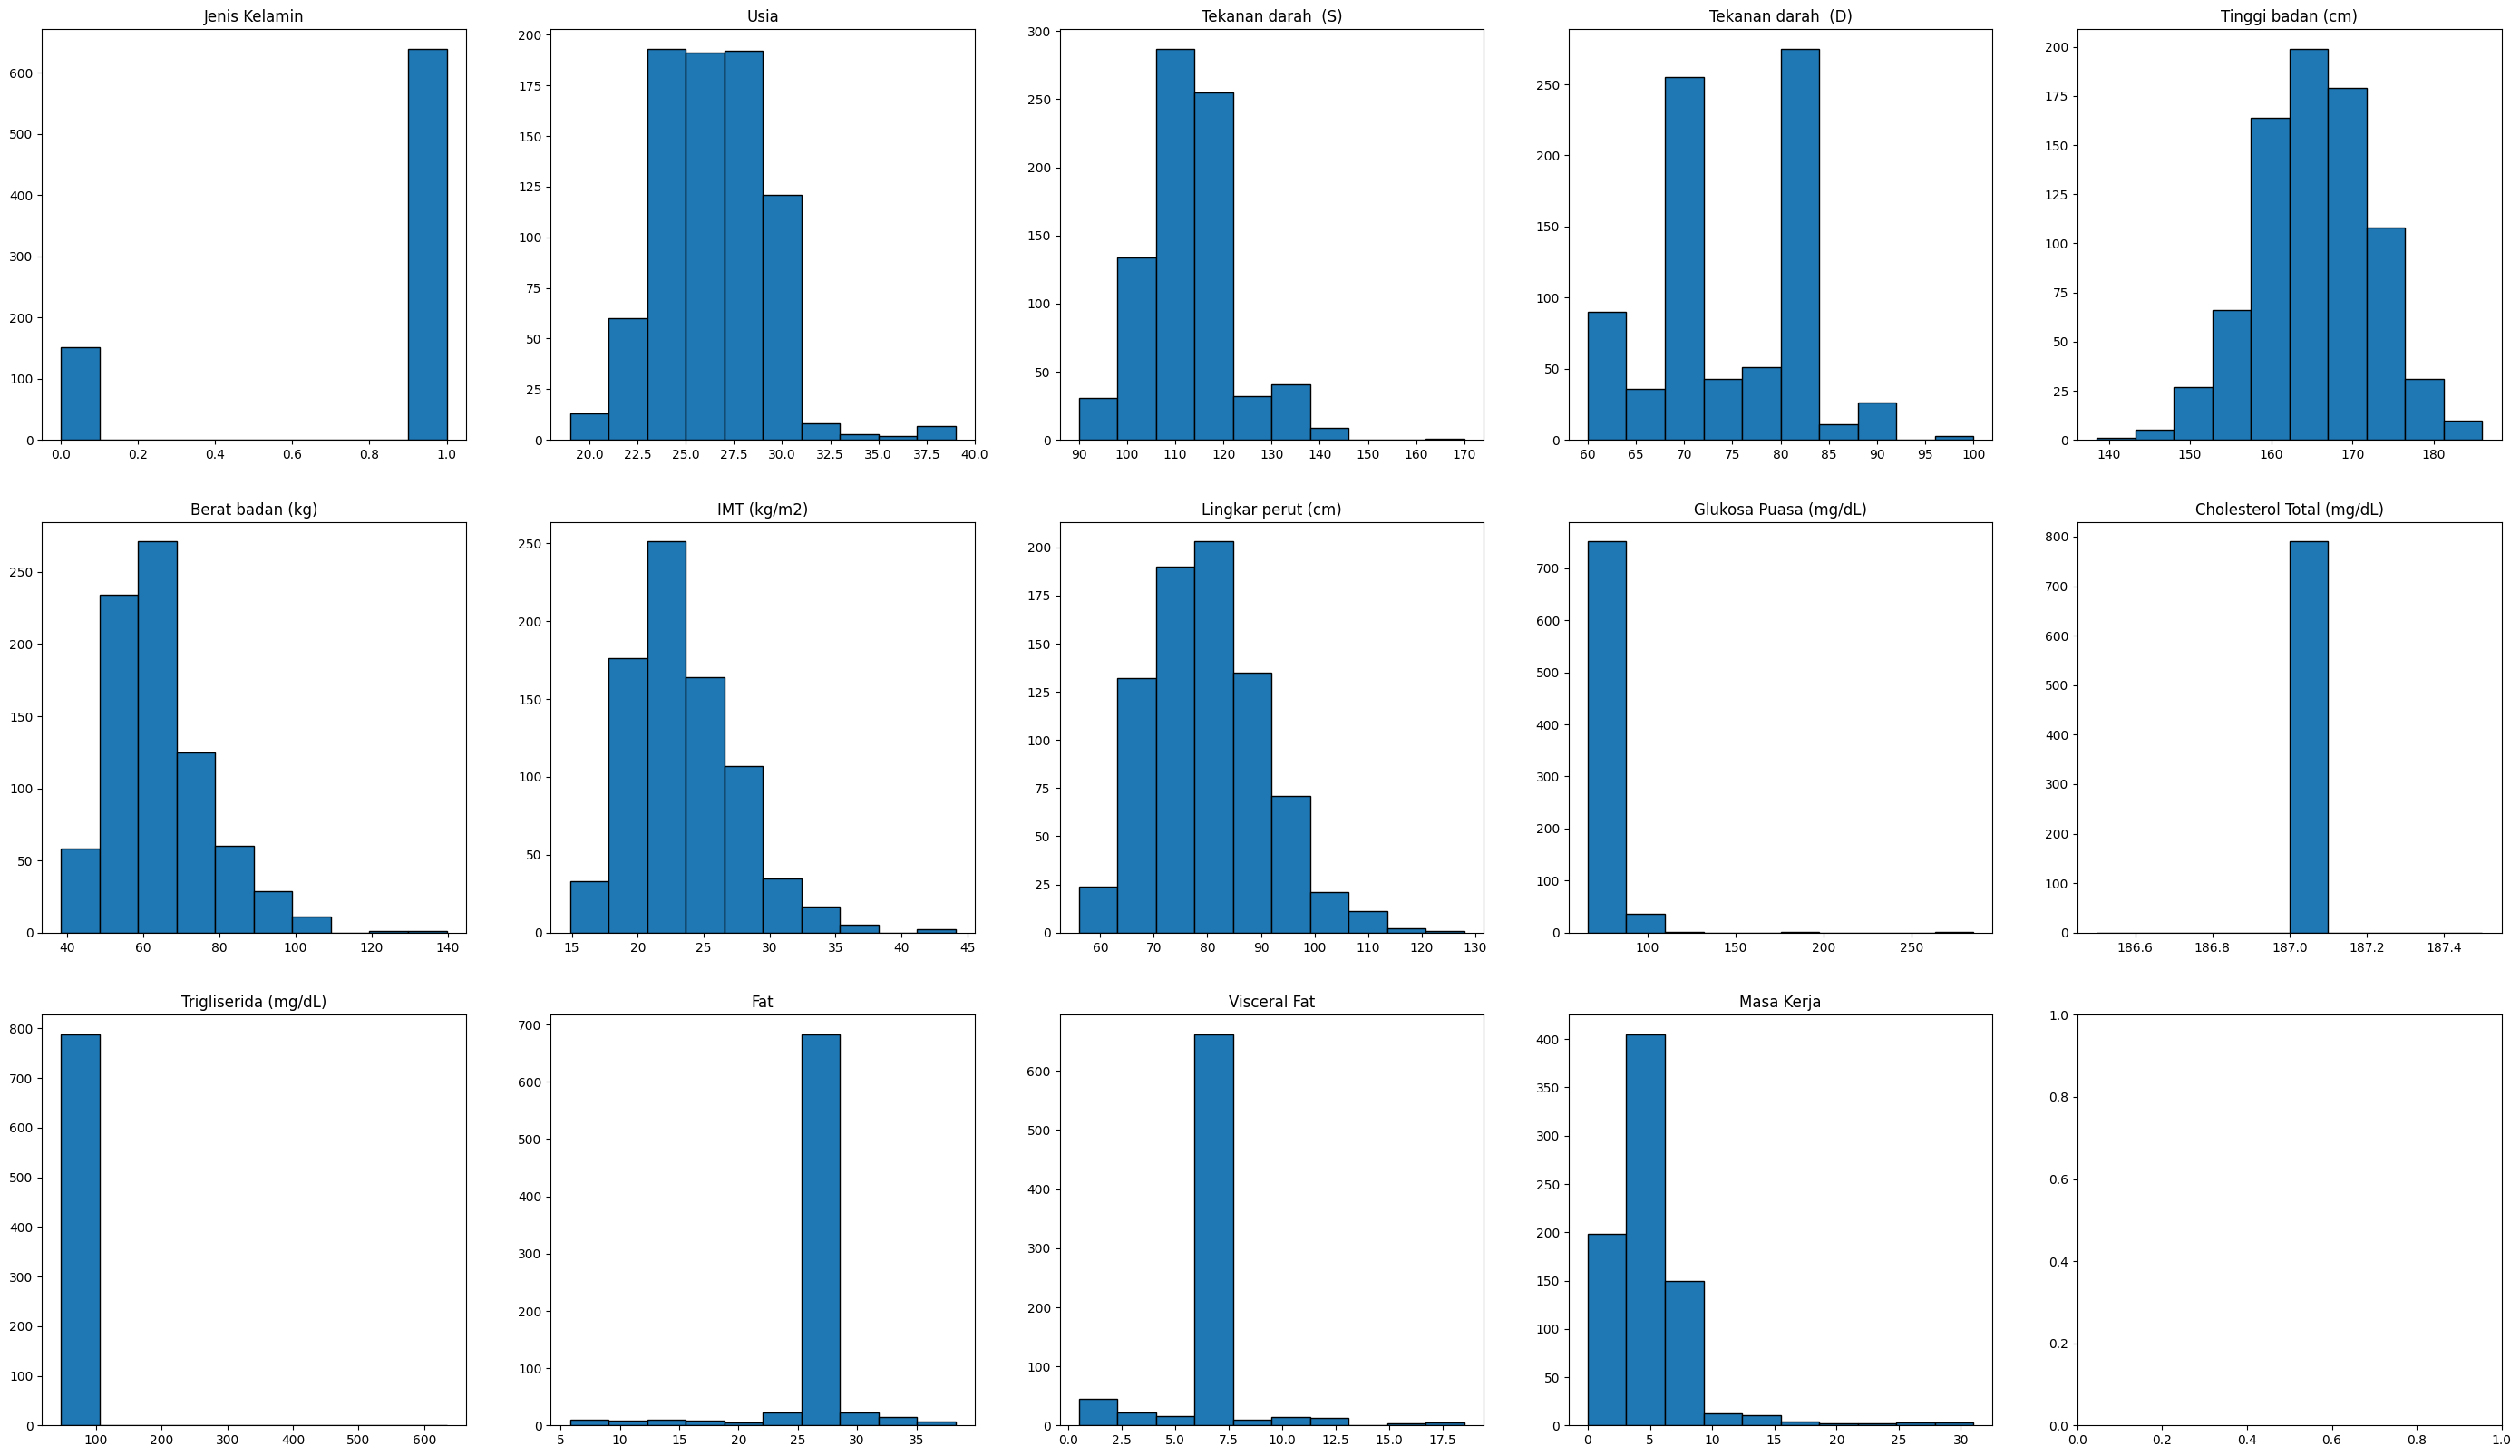

In [7]:
histogram_plotter(data1)

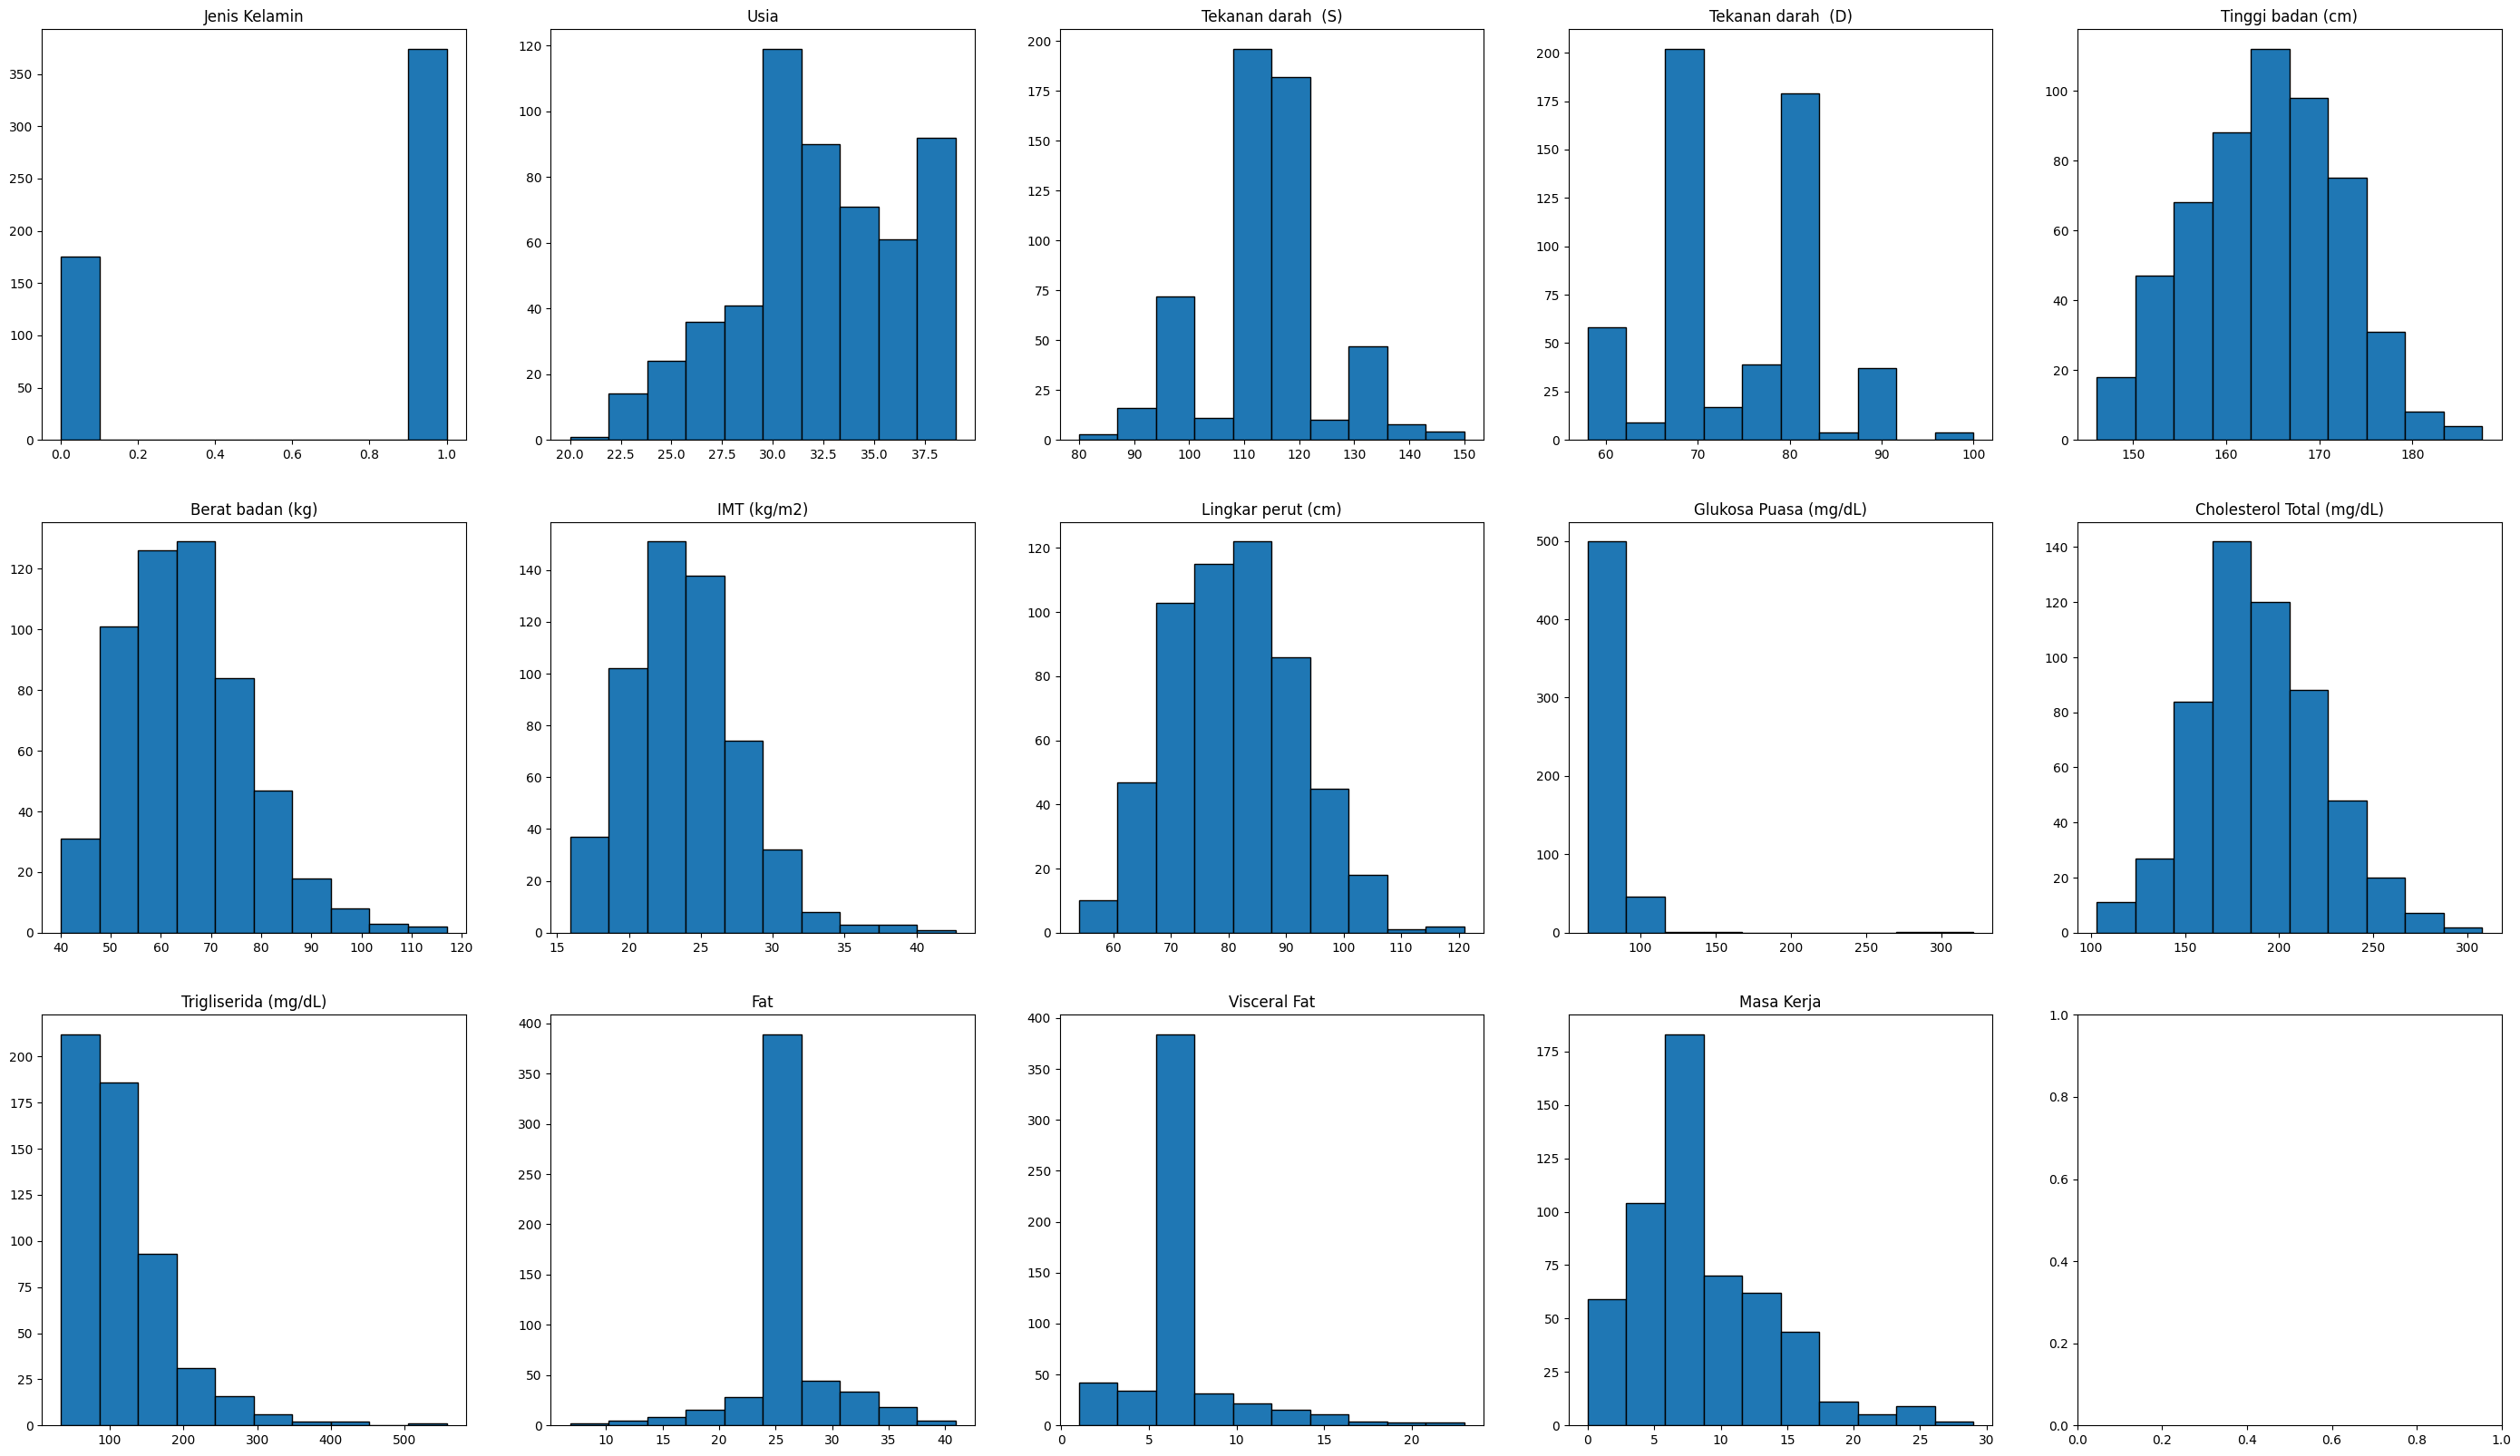

In [8]:
histogram_plotter(data2)

In [9]:
y = data['Cholesterol Total (mg/dL)'].apply(lambda x: 1 if x == 187 else 0)
X = data.drop('Cholesterol Total (mg/dL)', axis=1)

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Creating XGBoost model
model = XGBClassifier()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Performing stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(
    model, X, y, cv=stratified_kfold, scoring='accuracy')

In [10]:
print(cv_scores)

[0.98507463 0.98134328 0.99253731 0.98880597 0.97378277]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

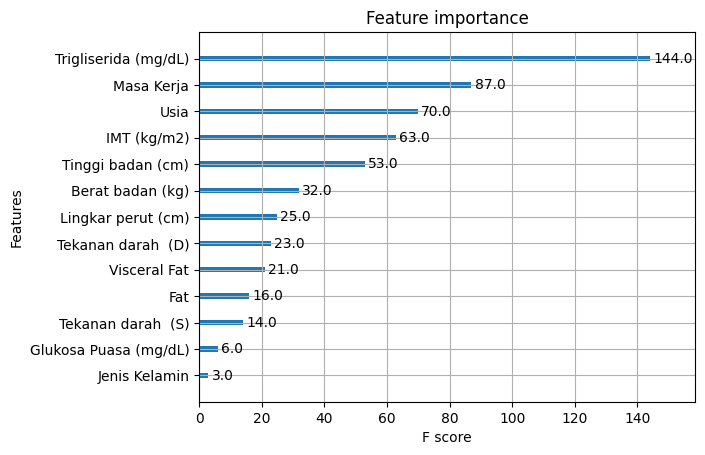

In [11]:
from xgboost import plot_importance
plot_importance(model)

In [12]:
for i in range(len(X.columns)):
    print(X.columns[i], model.feature_importances_[i])

Jenis Kelamin 0.01254657
Usia 0.62807477
Tekanan darah  (S) 0.02655958
Tekanan darah  (D) 0.005953287
Tinggi badan (cm) 0.01015791
Berat badan (kg) 0.010830327
IMT (kg/m2) 0.0070648147
Lingkar perut (cm) 0.013108836
Glukosa Puasa (mg/dL) 0.008245401
Trigliserida (mg/dL) 0.24011503
Fat 0.011682729
Visceral Fat 0.013825882
Masa Kerja 0.011834851


In [13]:
print("Data Kolesterol")
data1['Trigliserida (mg/dL)'].value_counts()

Data Kolesterol


Trigliserida (mg/dL)
99.0     783
78.0       1
47.0       1
88.0       1
76.0       1
634.0      1
84.0       1
129.0      1
Name: count, dtype: int64

In [14]:
data2['Trigliserida (mg/dL)'].value_counts()

Trigliserida (mg/dL)
80.0     10
81.0      9
82.0      9
68.0      8
77.0      8
         ..
219.0     1
179.0     1
210.0     1
203.0     1
331.0     1
Name: count, Length: 186, dtype: int64

In [15]:
data2[data2['Trigliserida (mg/dL)'] == 99]

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Cholesterol Total (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja
279,0,24.0,100.0,70.0,157.0,55.60,22.55,80.0,84.0,260.0,99.0,30.7,4.0,8.19
885,1,30.0,98.0,68.0,160.0,42.20,16.48,76.0,84.0,120.0,99.0,12.0,1.0,6.47
895,0,30.0,120.0,80.0,154.0,55.15,23.25,86.0,84.0,182.0,99.0,32.2,5.0,9.00
931,1,30.0,130.0,90.0,154.0,59.60,25.10,79.0,84.0,148.0,99.0,26.4,6.0,7.21
948,1,31.0,110.0,70.0,172.0,52.65,17.80,65.0,84.0,172.0,99.0,26.4,6.0,9.15
1166,1,35.0,130.0,80.0,165.0,59.85,22.00,73.0,84.0,154.0,99.0,26.4,6.0,15.75
1169,1,35.0,110.0,76.0,162.5,60.85,23.20,74.0,84.0,148.0,99.0,26.4,6.0,6.54
1193,1,36.0,150.0,90.0,161.5,66.55,25.70,84.0,84.0,204.0,99.0,26.6,11.0,12.00


In [16]:
data['Masa Kerja'].describe()

count    1339.000000
mean        6.401837
std         4.554438
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        31.000000
Name: Masa Kerja, dtype: float64

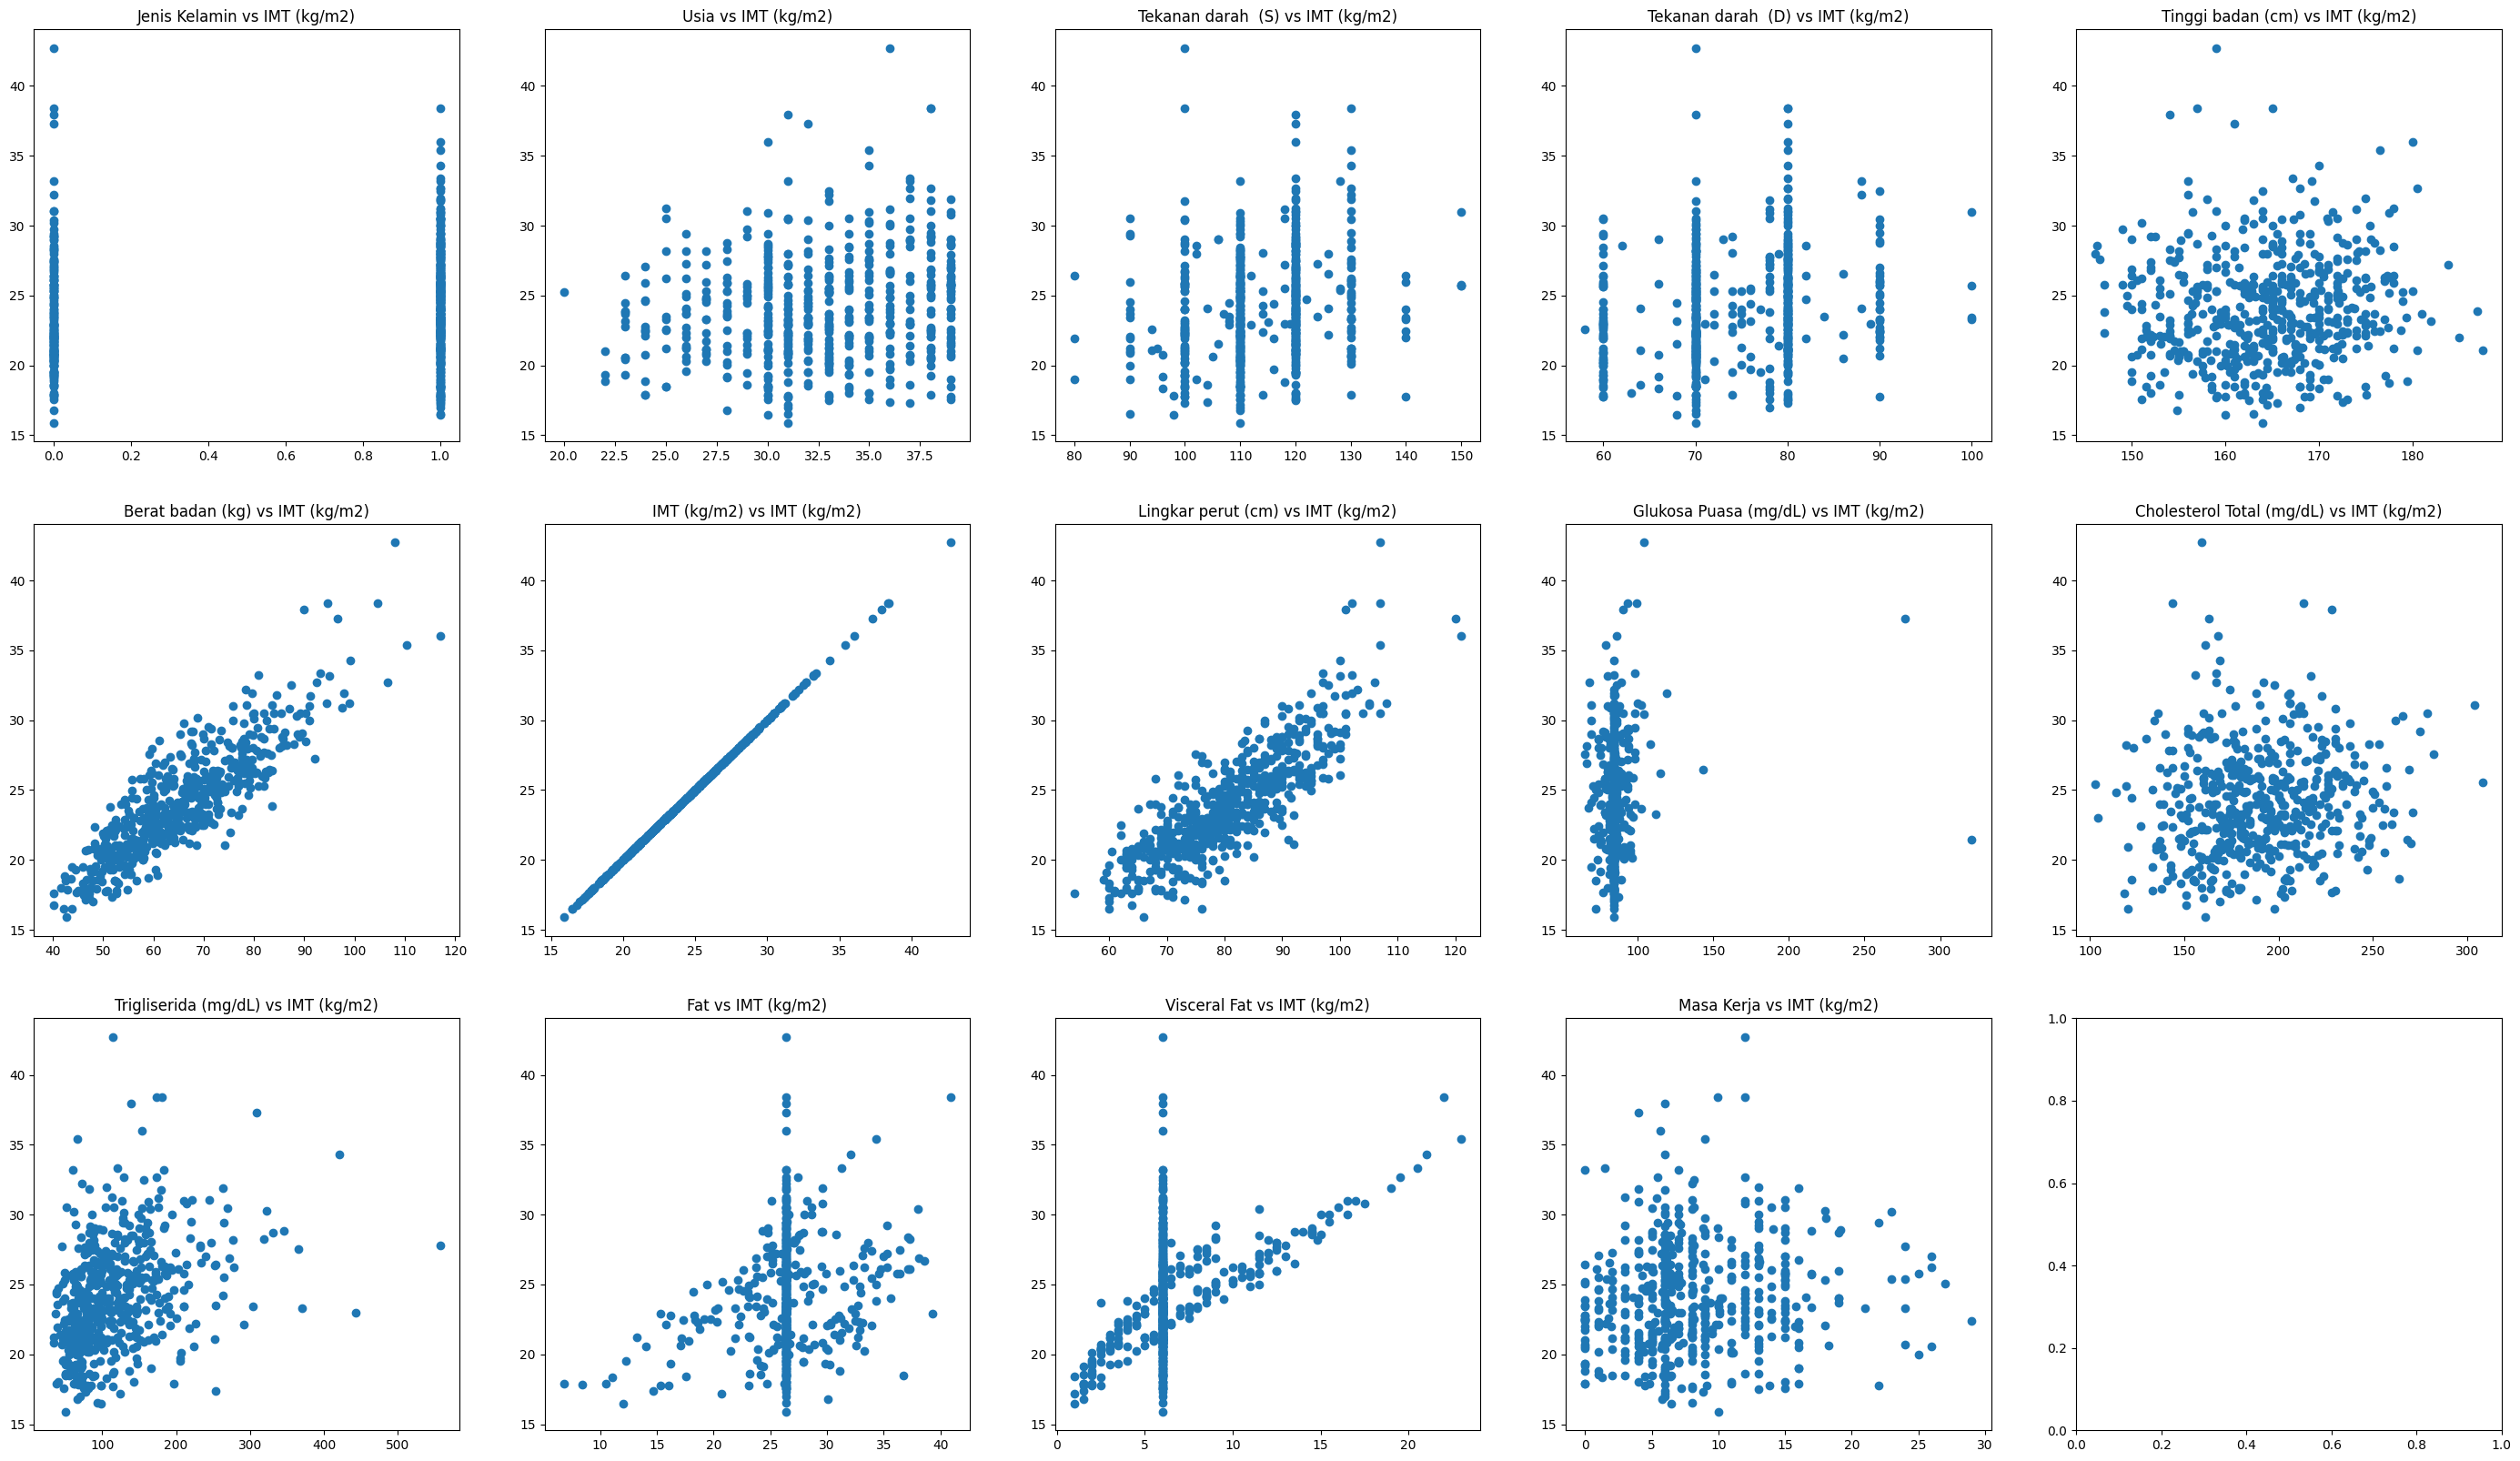

In [17]:
plotter(data2, 'IMT (kg/m2)')

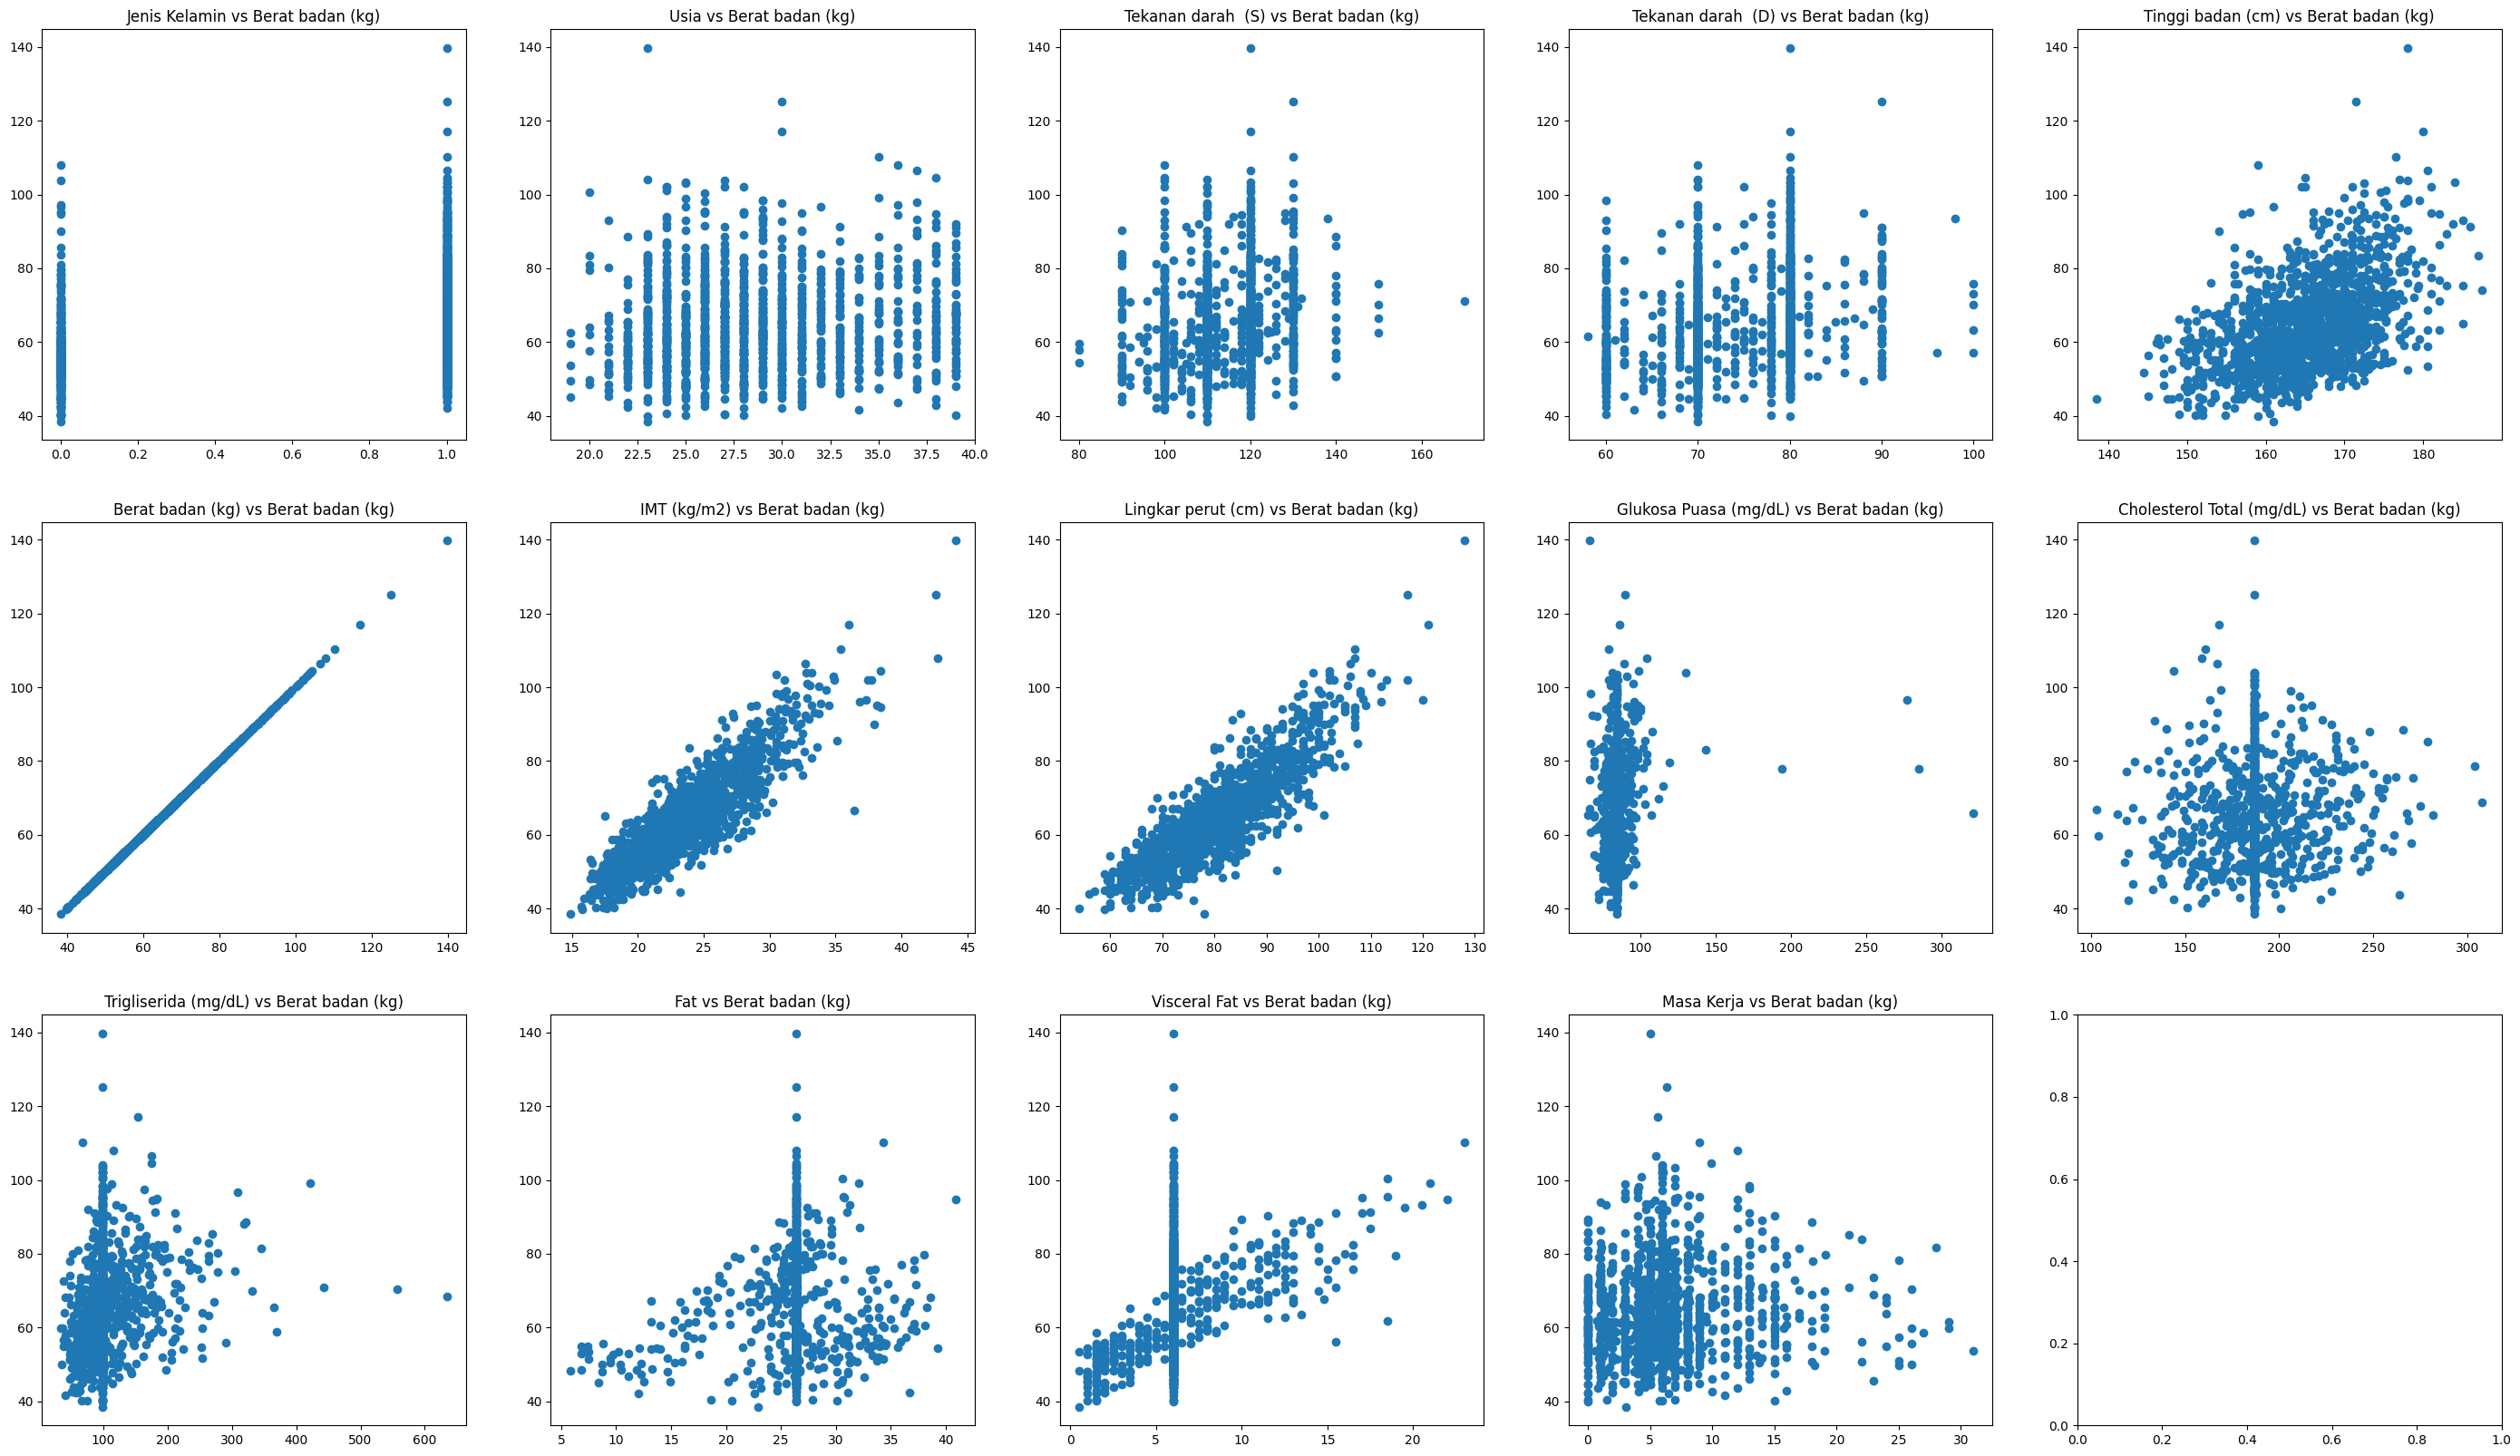

In [18]:
plotter(data, 'Berat badan (kg)')

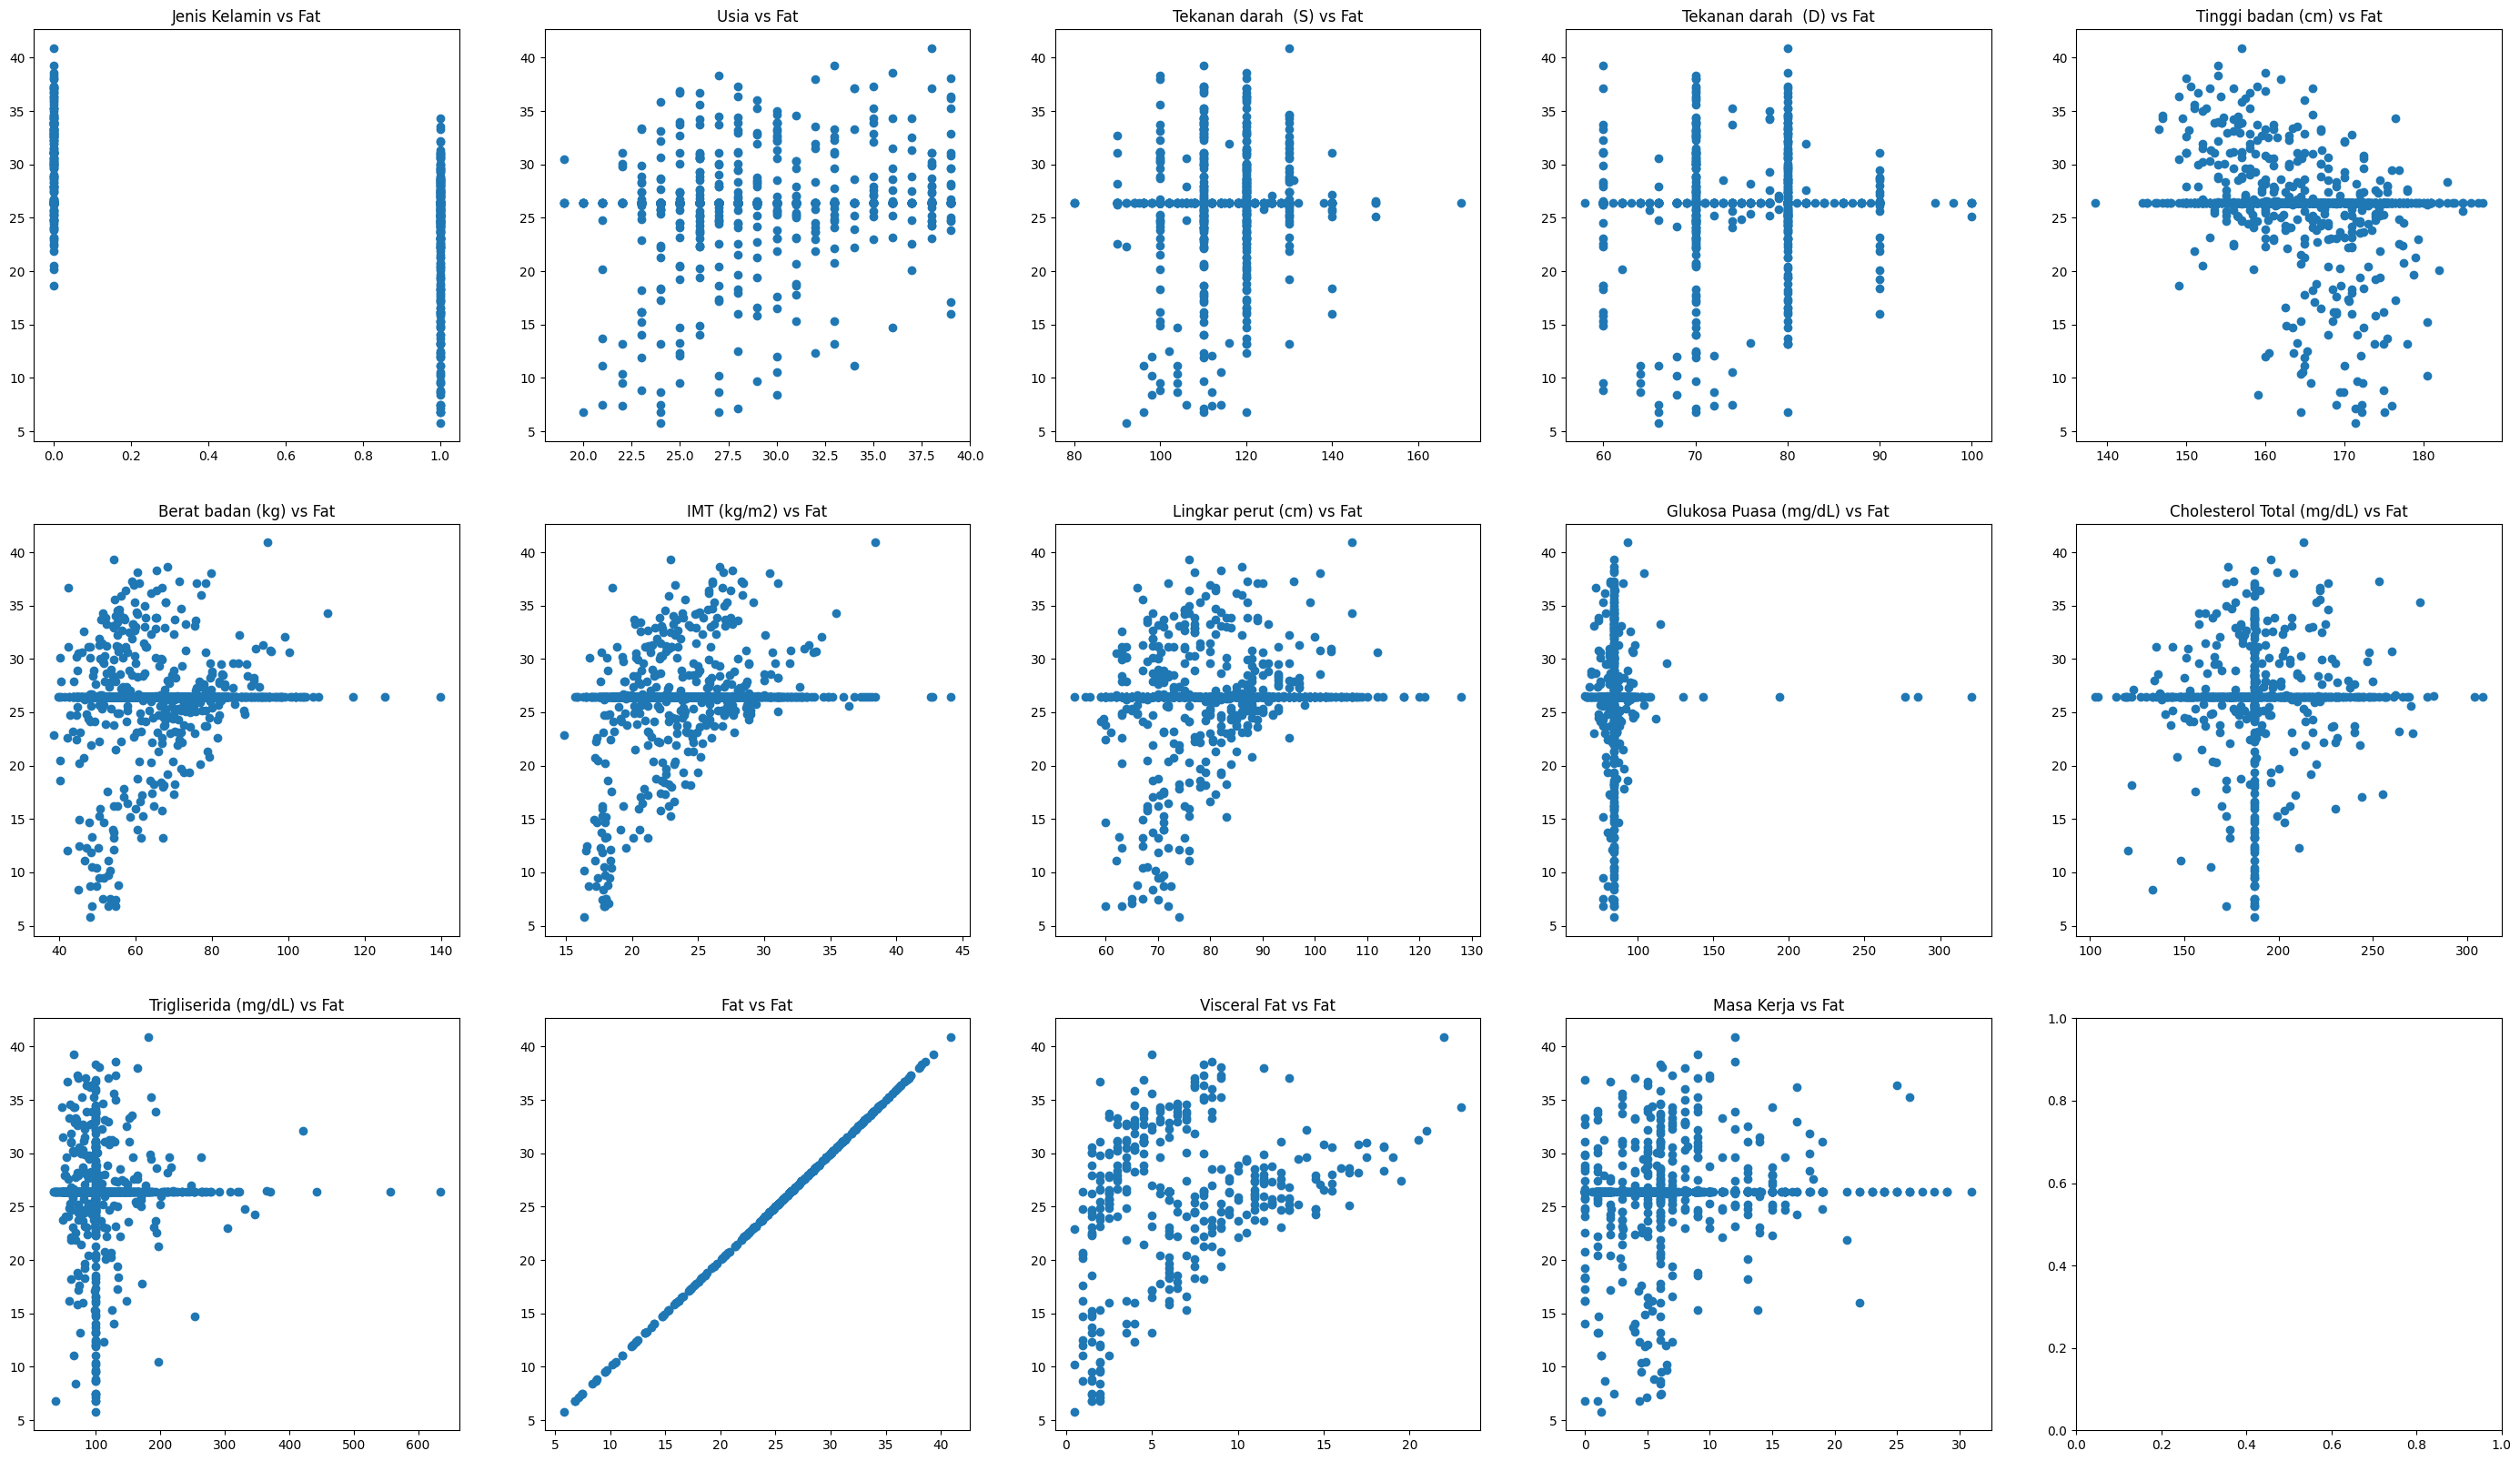

In [19]:
plotter(data, 'Fat')

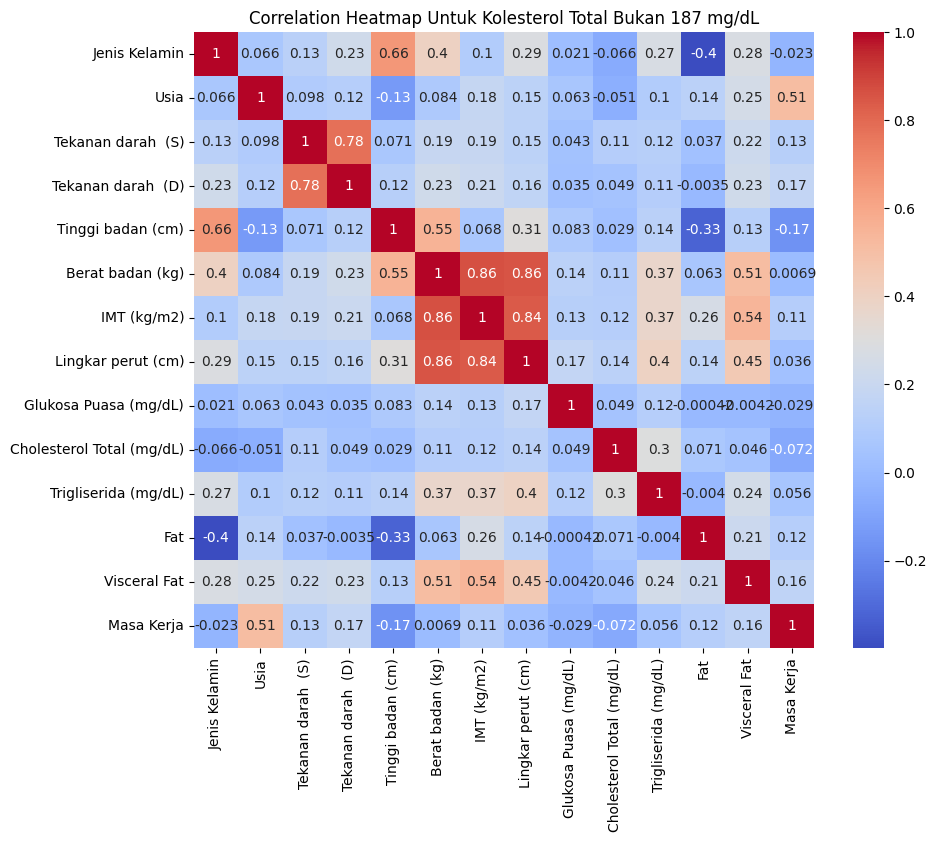

In [20]:
numerical_data = data2.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
highest_correlation_column = correlation_matrix['Cholesterol Total (mg/dL)'].abs().idxmax()
highest_correlation_value = correlation_matrix['Cholesterol Total (mg/dL)'].abs().max()

highest_correlation_column, highest_correlation_value
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Untuk Kolesterol Total Bukan 187 mg/dL')
plt.show()


In [21]:
data2['Fat'].value_counts()

Fat
26.4    339
25.2      5
27.9      5
29.6      5
23.1      4
       ... 
18.8      1
25.5      1
26.8      1
34.6      1
17.1      1
Name: count, Length: 132, dtype: int64

In [22]:
data2['Visceral Fat'].value_counts()

Visceral Fat
6.0     354
2.5      12
2.0      11
4.0      10
8.0      10
8.5      10
11.5     10
9.0       9
3.5       9
7.5       9
1.5       8
5.0       8
3.0       8
6.5       7
5.5       7
7.0       7
4.5       7
12.5      6
14.5      5
11.0      5
10.0      4
12.0      4
10.5      3
1.0       3
13.5      2
9.5       2
15.5      2
15.0      2
13.0      2
16.5      2
19.0      1
17.5      1
22.0      1
19.5      1
14.8      1
20.5      1
14.0      1
21.0      1
23.0      1
16.0      1
17.0      1
Name: count, dtype: int64

In [23]:
def correct_with_regression(data, col, val):
    correct_data = data[data[col] != val][['IMT (kg/m2)', col]]
    x, y = correct_data[['IMT (kg/m2)']], correct_data[[col]]
    model = LinearRegression()
    model.fit(x, y)
    print(f'{col} = {model.coef_[0][0]} IMT + {model.intercept_[0]}')
    y_pred = model.predict(data[['IMT (kg/m2)']])
    ret_pred = []

    def rounder(x, col):
        best = 10**9
        for elm in data[col].unique():
            if abs(elm-x) < abs(best-x):
                best = elm
        return best

    check = data[['IMT (kg/m2)', col]]
    for idx in range(len(check)):
        if check.iloc[idx,1] == val:
            ret_pred.append(rounder(y_pred[idx], col))
        else:
            ret_pred.append(check.iloc[idx,1])
    
    return np.array(ret_pred)

In [24]:
data2['Fat'] = correct_with_regression(data2, 'Fat', 26.4)

Fat = 0.706167850590901 IMT + 9.747593137038464


In [25]:
data2['Visceral Fat'] = correct_with_regression(data2, 'Visceral Fat', 6)

Visceral Fat = 1.1306780681545157 IMT + -19.646386225471904


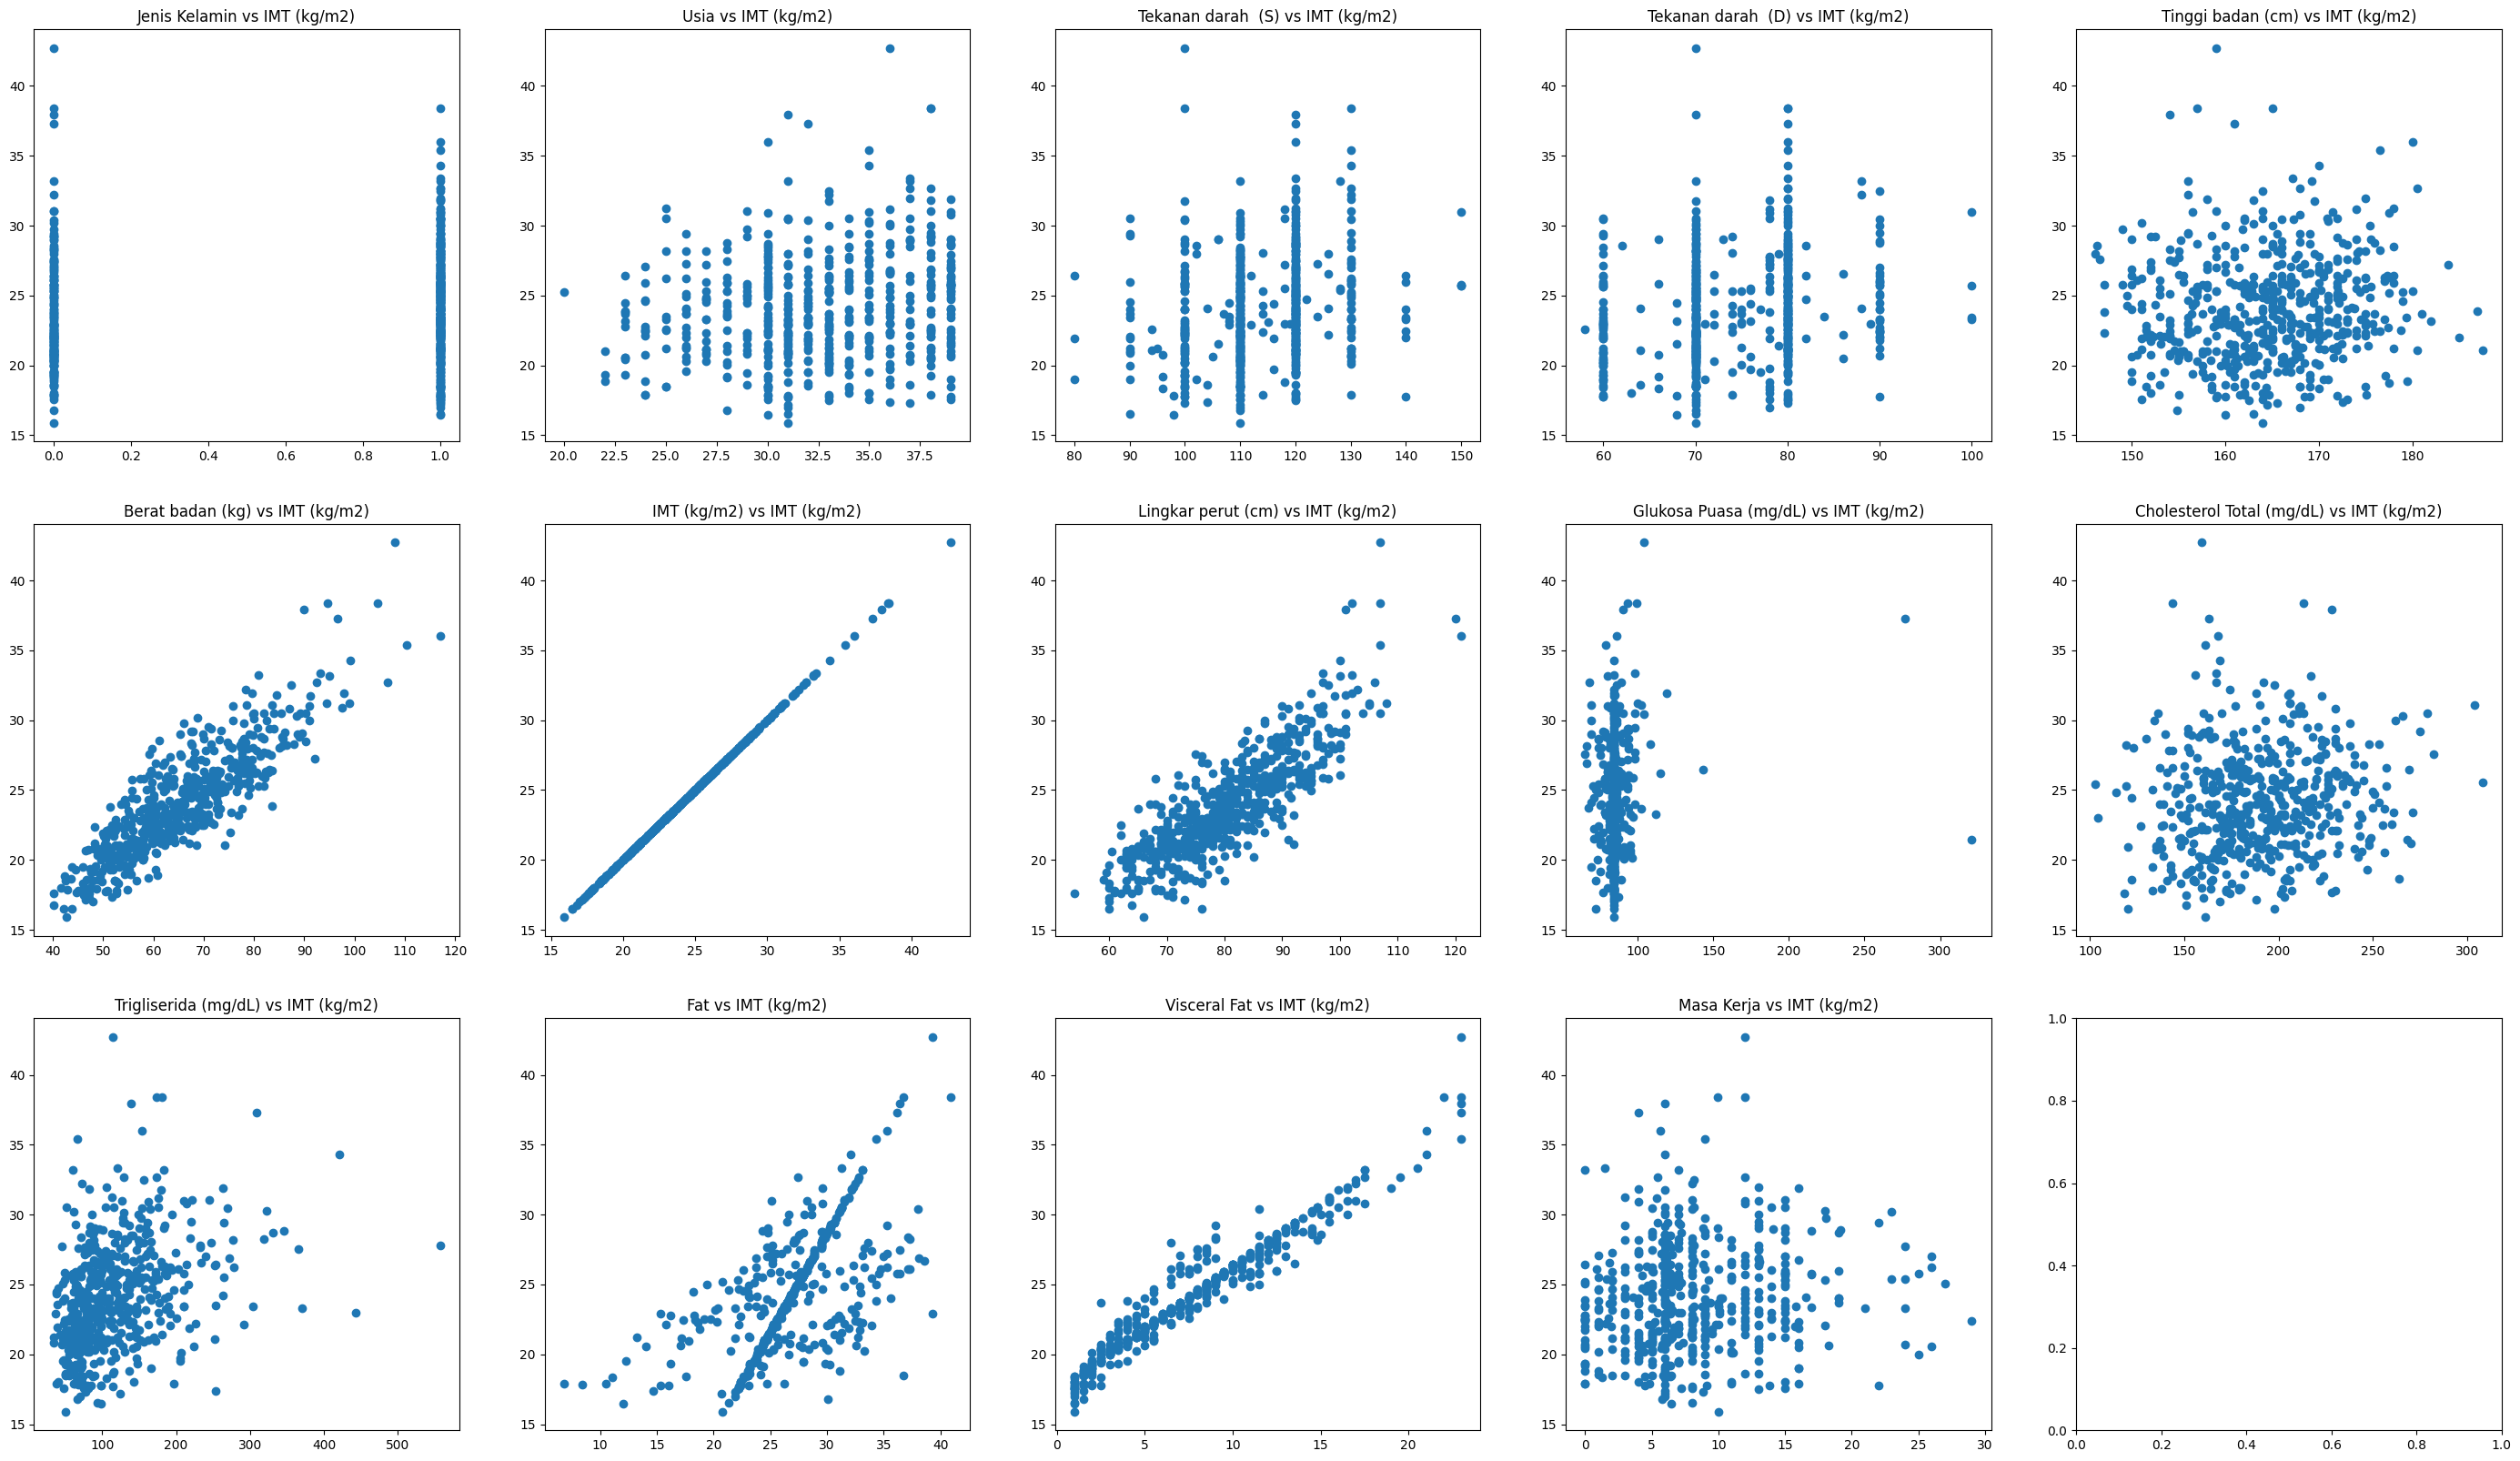

In [26]:
plotter(data2, 'IMT (kg/m2)')

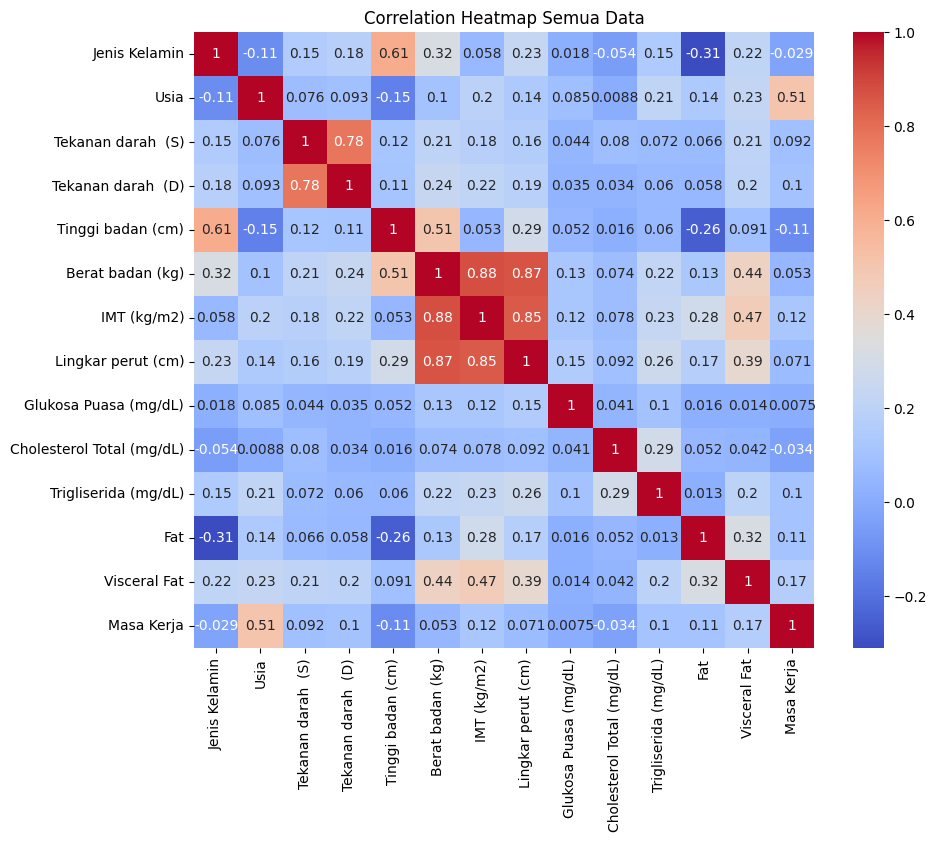

In [27]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
highest_correlation_column = correlation_matrix['Cholesterol Total (mg/dL)'].abs().idxmax()
highest_correlation_value = correlation_matrix['Cholesterol Total (mg/dL)'].abs().max()

highest_correlation_column, highest_correlation_value
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Semua Data')
plt.show()

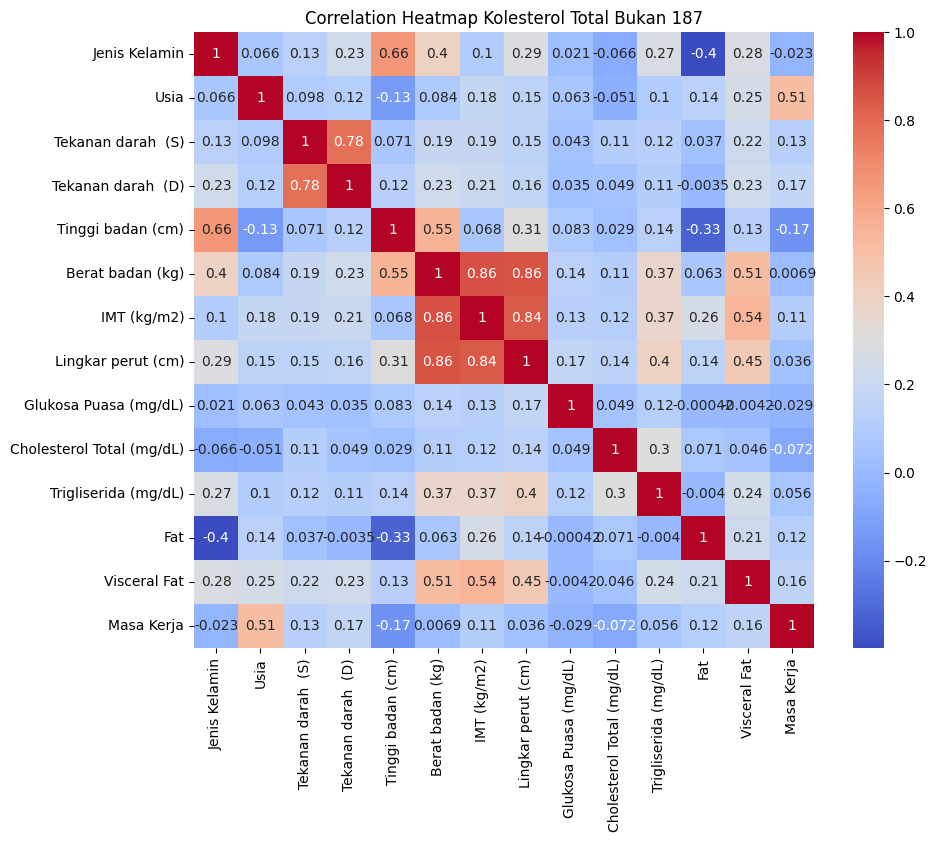

In [29]:
numerical_data = data[data['Cholesterol Total (mg/dL)'] != 187].select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
highest_correlation_column = correlation_matrix['Cholesterol Total (mg/dL)'].abs().idxmax()
highest_correlation_value = correlation_matrix['Cholesterol Total (mg/dL)'].abs().max()

highest_correlation_column, highest_correlation_value
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Kolesterol Total Bukan 187')
plt.show()

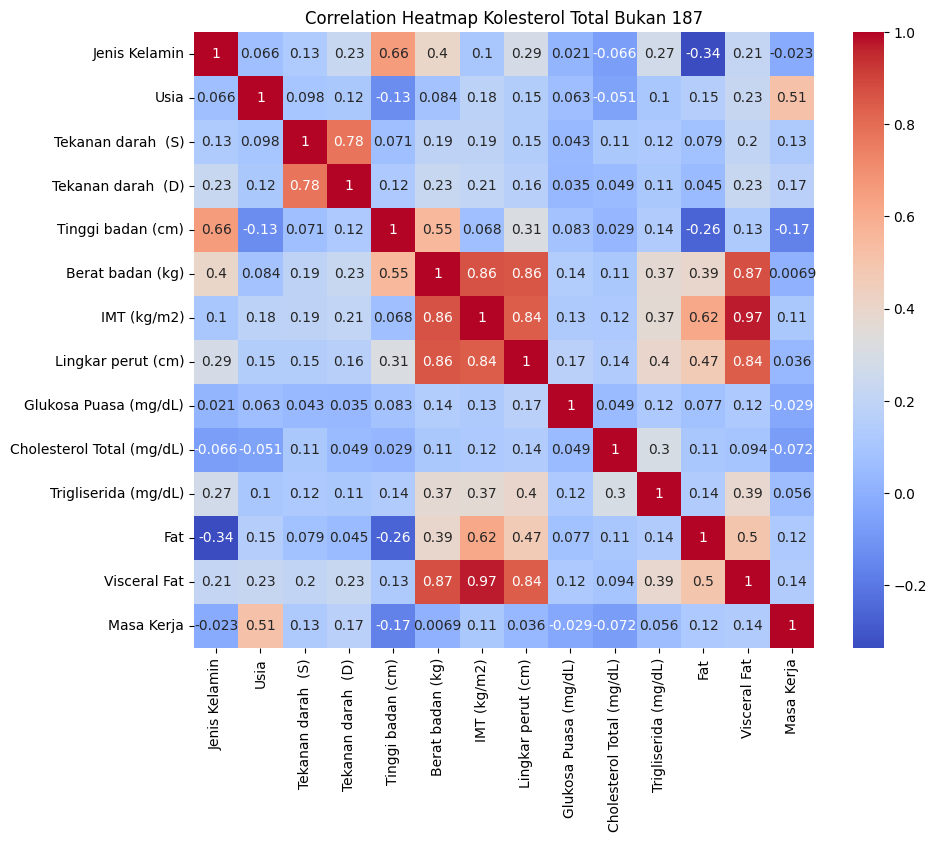

In [31]:
numerical_data = data2.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
highest_correlation_column = correlation_matrix['Cholesterol Total (mg/dL)'].abs().idxmax()
highest_correlation_value = correlation_matrix['Cholesterol Total (mg/dL)'].abs().max()

highest_correlation_column, highest_correlation_value
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Kolesterol Total Bukan 187')
plt.show()

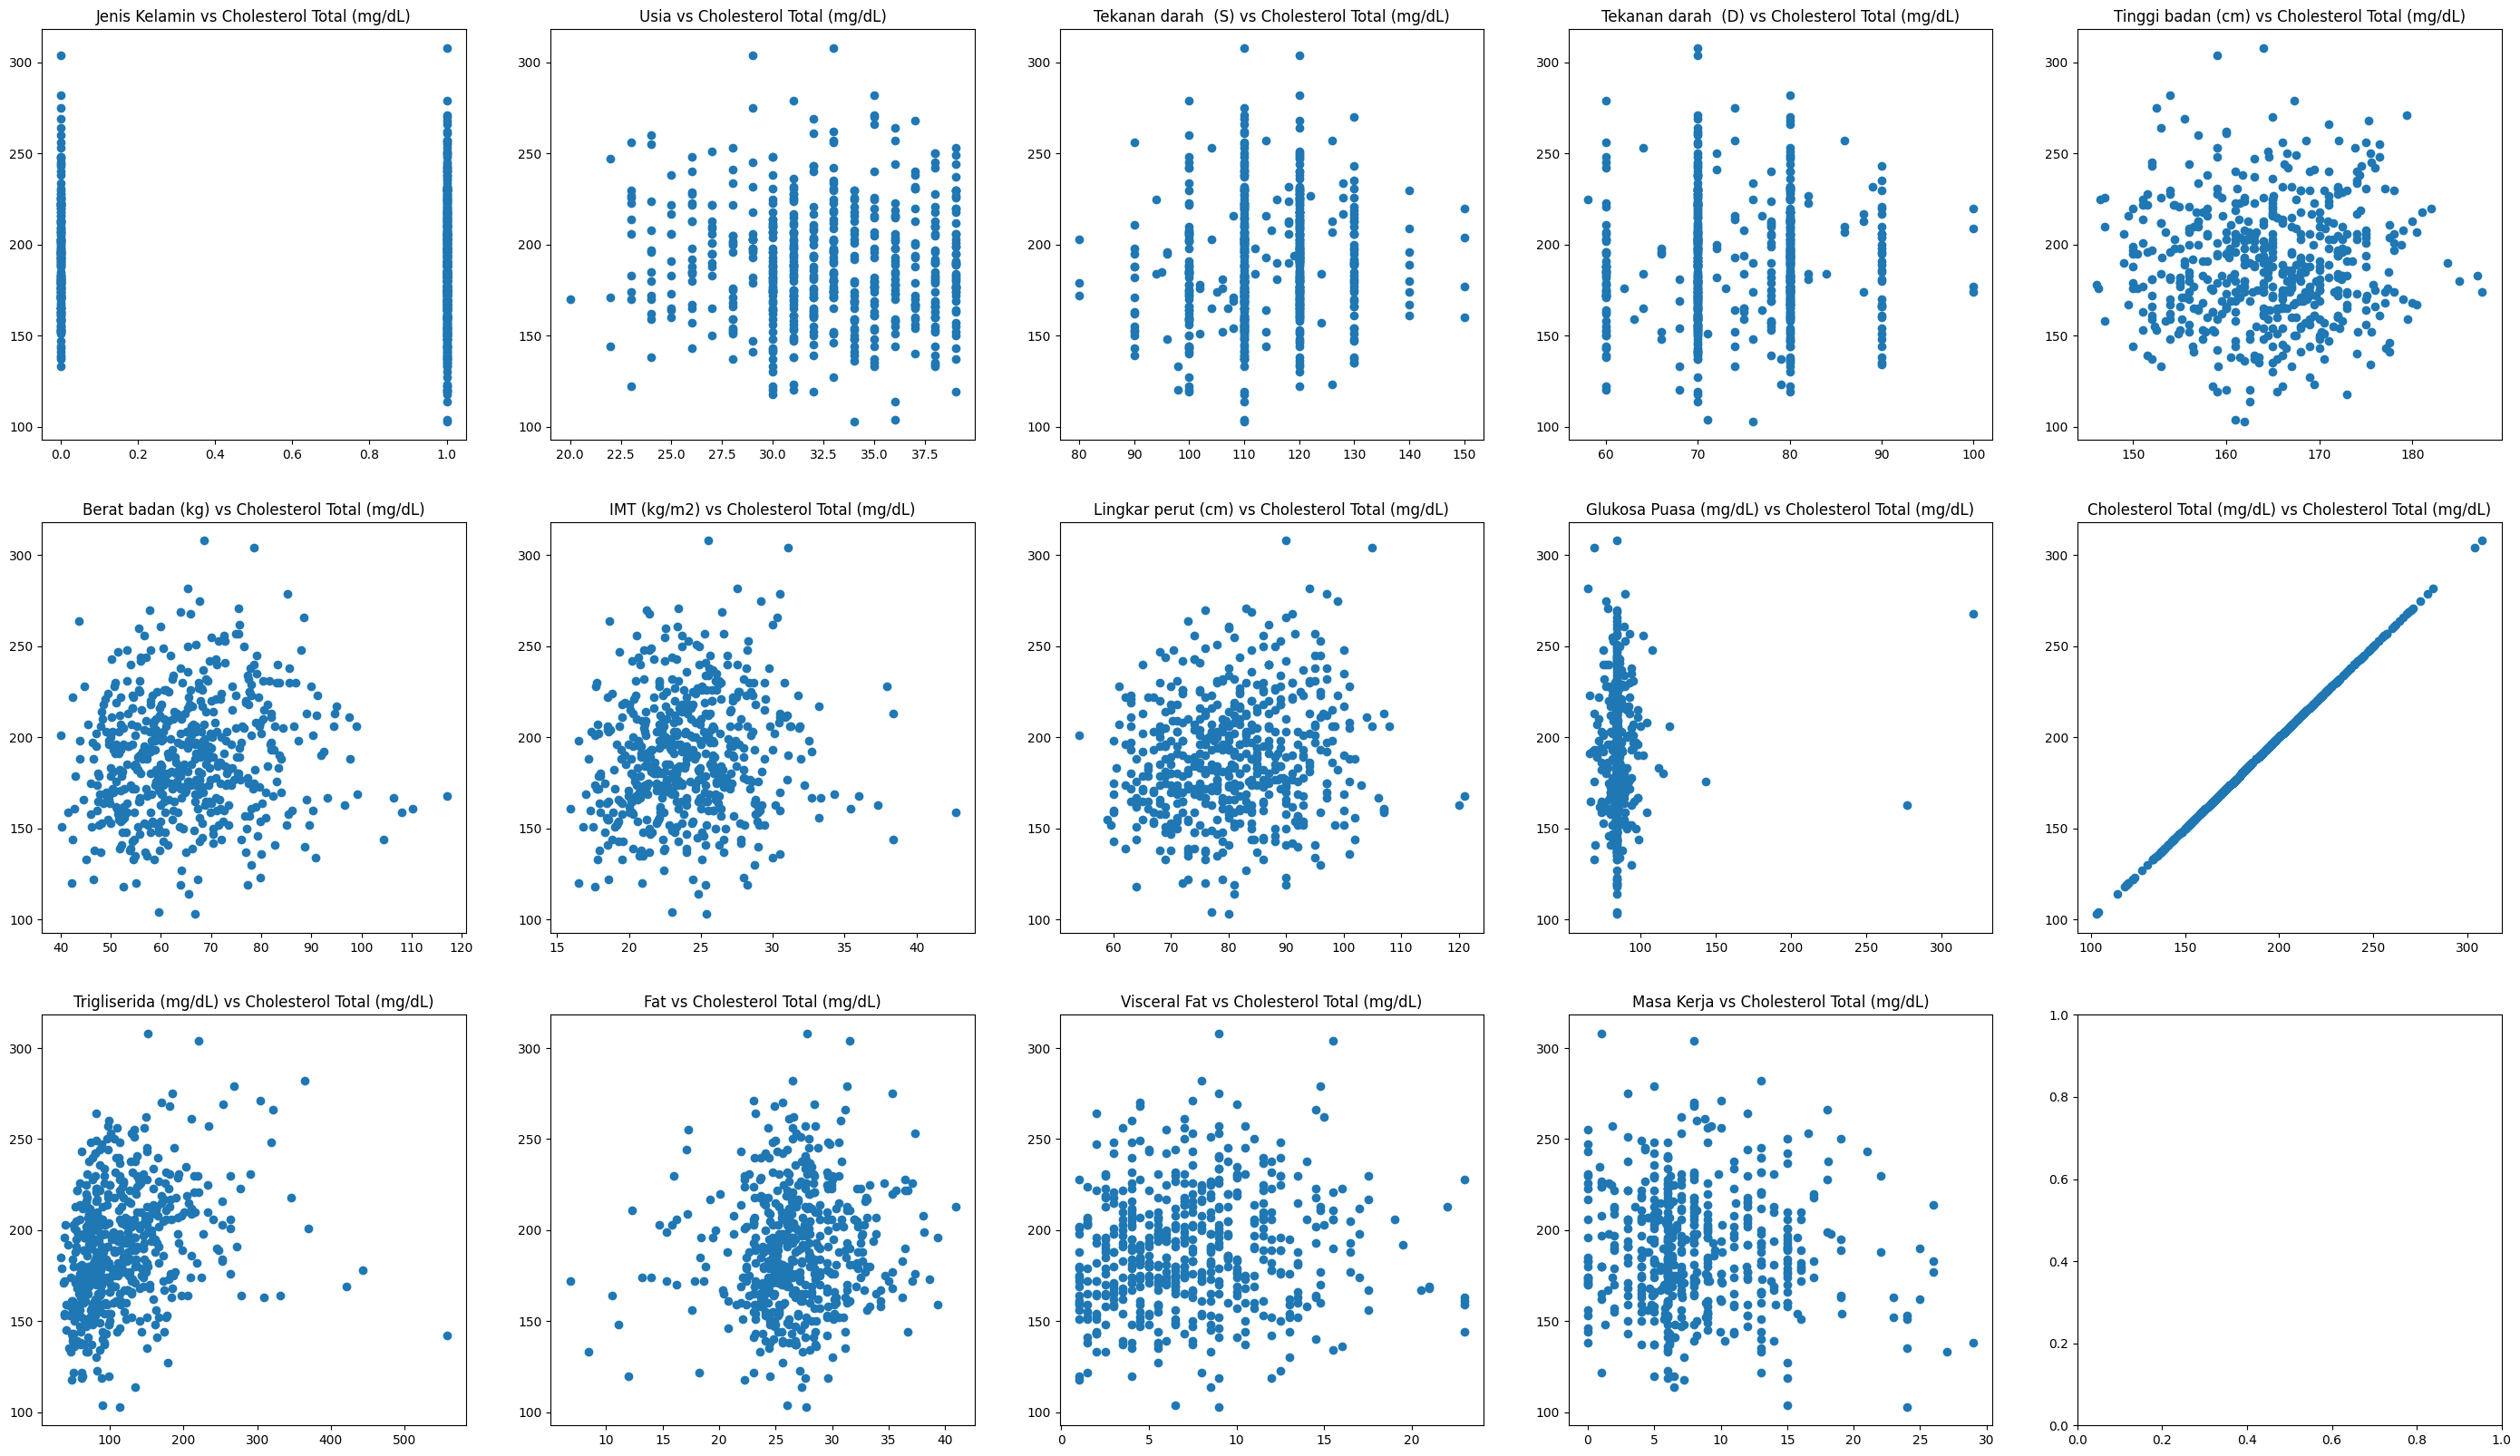

In [30]:
plotter(data2, 'Cholesterol Total (mg/dL)')